In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d    

import numpy as np
import plot

plt.style.use('dark_background') 

%matplotlib inline

PATH = '../img/'
path2 = "C:/Users/yanet/Pictures/Camera Roll/WIN_20231014_16_36_37_Pro.jpg"

In [3]:
im = cv.imread(PATH+'lenna.png', cv.IMREAD_COLOR)
# im = cv.imread(path2, cv.IMREAD_COLOR)
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
print(img.shape)
# plot.imgview(img)

(512, 512, 3)


In [4]:
def pencil_sketch_col(img):
    #inbuilt function to create sketch effect in colour and greyscale
    sk_gray, sk_color = cv.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.1) 
    return  sk_color

In [5]:
def HDR(img):
    hdr = cv.detailEnhance(img, sigma_s=12, sigma_r=0.15)
    return  hdr

In [6]:
# imagen = img
import cv2 as cv
import numpy as np
import cvlib

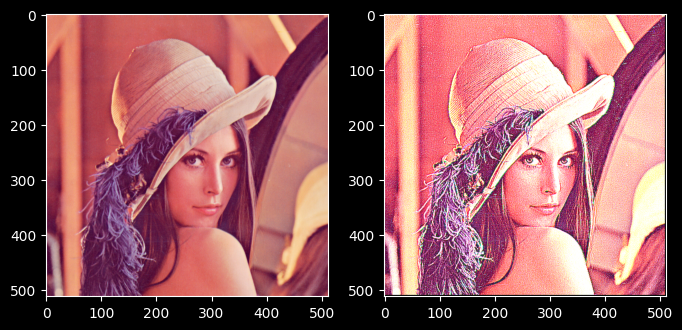

In [7]:

def sharpen_img(imagen):
    kernel = np.array([[-1, -1, -1],
                    [-1, 9.5, -1],
                    [-1, -1, -1]])

    alto, ancho, _ = imagen.shape
    tam_kernel = kernel.shape[0]

    imagen_conv = np.zeros((alto, ancho, 3))

    for y in range(ancho - tam_kernel + 1):
        for x in range(alto - tam_kernel + 1):

            canal1 = abs((imagen[y:y + tam_kernel, x:x + tam_kernel, 0] * kernel).sum())
            if(canal1 <= 0):
                imagen_conv[y, x, 0] = 0
            elif(canal1 >= 255):
                imagen_conv[y, x, 0] = 255
            else:
                imagen_conv[y, x, 0] = canal1
            
            canal2 = abs((imagen[y:y + tam_kernel, x:x + tam_kernel, 1] * kernel).sum())
            if( canal2 <= 0):
                imagen_conv[y, x, 1] = 0
            elif(canal2 >= 255):
                imagen_conv[y, x, 1] = 255
            else:
                imagen_conv[y, x, 1] = canal2

            canal3 = abs((imagen[y:y + tam_kernel, x:x + tam_kernel, 2] * kernel).sum())
            if( canal3 <= 0):
                imagen_conv[y, x, 2] = 0
            elif(canal3 >= 255):
                imagen_conv[y, x, 2] = 255
            else:
                imagen_conv[y, x, 2] = canal3

    img_sc = imagen_conv.astype(np.uint8)
    
    cvlib.imgcmp(imagen, img_sc)
img = cv.imread('lenna.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
a = sharpen_img(img)

# plot.imgview(a)


In [8]:
import cv2
import numpy as np

def sharpen_img(imagen):
    kernel = np.array([[-1, -1, -1],
                       [-1, 9.5, -1],
                       [-1, -1, -1]])

    alto, ancho, _ = imagen.shape
    tam_kernel = kernel.shape[0]

    imagen_conv = np.zeros((alto, ancho, 3), dtype=np.uint8)

    for y in range(tam_kernel // 2, alto - tam_kernel // 2):
        for x in range(tam_kernel // 2, ancho - tam_kernel // 2):
            for c in range(3):  # canales de color (BGR)
                imagen_conv[y, x, c] = np.sum(imagen[y - tam_kernel // 2:y + tam_kernel // 2 + 1, x - tam_kernel // 2:x + tam_kernel // 2 + 1, c] * kernel)
                imagen_conv[y, x, c] = np.clip(imagen_conv[y, x, c], 0, 255)

    img_sc = imagen_conv

    return img_sc

# Ejemplo de uso:
imagen = cv2.imread('lenna.png')
imagen_sharp = sharpen_img(imagen)
cv2.imwrite('imagen_nitida.jpg', imagen_sharp)
# En esta versión del código, el bucle se utiliza para aplicar manualmente el kernel a la imagen, y se utiliza np.clip para asegurarse de que los valores de píxel estén en el rango válido (0-255). Luego, la imagen mejorada se devuelve. Asegúrate de reemplazar 'tu_imagen.jpg' por la ruta de la imagen que deseas procesar y ajustar el resultado según sea necesario.







True

In [9]:
def sharpen_img(imagen, kernel):
    alto, ancho, _ = imagen.shape
    tam_kernel = kernel.shape[0]

    imagen_conv = np.zeros((alto, ancho, 3))

    for y in range(alto - tam_kernel + 1):
        for x in range(ancho - tam_kernel + 1):
            for c in range(3):
                conv_value = (imagen[y:y + tam_kernel, x:x + tam_kernel, c] * kernel).sum()

                if conv_value <= 0:
                    imagen_conv[y, x, c] = 0
                elif conv_value >= 255:
                    imagen_conv[y, x, c] = 255
                else:
                    imagen_conv[y, x, c] = conv_value

    return imagen_conv.astype(np.uint8)

In [10]:
kernel = np.array([[-1, -1, -1],
                       [-1, 9.5, -1],
                       [-1, -1, -1]])

In [11]:
%timeit sharpen_img(img, kernel)

6.04 s ± 1.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time

%matplotlib inline
%load_ext cython

# ignore distracting warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
%%cython -a
import cython
import numpy as np
cimport numpy as np

@cython.boundscheck(False)
cpdef np.ndarray[np.uint8_t,ndim=3] sharpen_img_cython(np.ndarray[np.uint8_t,ndim=3] imagen, np.ndarray[np.float64_t,ndim=2] kernel):
    cdef int alto, ancho, tam_kernel, y, x, c, tam_kernel_c, i, j
    cdef float t, conv_value
    cdef np.ndarray[np.float64_t,ndim=3] imagen_conv
    cdef unsigned char[:,:] r
    
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    tam_kernel = kernel.shape[0]
    tam_kernel_c = kernel.shape[1]

    imagen_conv = np.zeros((alto, ancho, 3))

    for y in range(alto - tam_kernel + 1):
        for x in range(ancho - tam_kernel + 1):
            for c in range(3):
                r = imagen[y:y + tam_kernel, x:x + tam_kernel, c]

                t = 0
                for i in range(tam_kernel):
                    for j in range(tam_kernel_c):
                            t += r[i,j] * kernel[i,j]


                conv_value = t
                #conv_value = np.multiply(imagen[y:y + tam_kernel, x:x + tam_kernel, c], kernel).sum()
                
                if conv_value <= 0:
                    imagen_conv[y, x, c] = 0
                elif conv_value >= 255:
                    imagen_conv[y, x, c] = 255
                else:
                    imagen_conv[y, x, c] = conv_value

    return imagen_conv.astype(np.uint8)

In [14]:
img2 = img.astype(np.uint8)

In [15]:
%timeit sharpen_img_cython(img2, kernel)

834 ms ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
def img_annotate(img, text, color=(0, 0, 255)):
    """ Annotate an image with text
    """
    cv.putText(img, text,(10, 120), cv.FONT_HERSHEY_SIMPLEX, 3, color)
    return img

In [19]:
from video import CountsPerSec, VideoCaptureThread, ImShowThread

def noThreading(source=0):
    """No threading text
    """

    cap = cv.VideoCapture(source)
    cps = CountsPerSec().start()

    while True:
        ret, frame = cap.read()
        if not ret or cv.waitKey(1) == ord("q"):
            break
        
        fps = str(round(cps.freq(),2))
        # frame = sharpen_img(frame, kernel)
        frame_filtro = sharpen_img_cython(frame, kernel)
        frame = img_annotate(frame_filtro, fps)

        cv.imshow("NO_THREAD", frame)
        cps.increment()

In [20]:
import timeit
cap = cv.VideoCapture("../video/maldives.mp4")
timeit.timeit(lambda:sharpen_img_cython(cap, kernel), number=1)

TypeError: Argument 'imagen' has incorrect type (expected numpy.ndarray, got cv2.VideoCapture)

In [18]:
noThreading("../video/maldives.mp4")

[[[194 189 142]
  [194 189 142]
  [194 189 142]
  ...
  [168 190 146]
  [168 190 146]
  [168 190 146]]

 [[194 189 142]
  [194 189 142]
  [194 189 142]
  ...
  [168 190 146]
  [168 190 146]
  [168 190 146]]

 [[196 191 144]
  [196 191 144]
  [196 191 144]
  ...
  [168 190 146]
  [168 190 146]
  [168 190 146]]

 ...

 [[188 219 117]
  [188 219 117]
  [188 221 114]
  ...
  [199 243  44]
  [179 227  16]
  [167 215   4]]

 [[188 219 117]
  [188 219 117]
  [188 221 114]
  ...
  [199 243  44]
  [179 227  16]
  [167 215   4]]

 [[188 219 117]
  [188 219 117]
  [188 221 114]
  ...
  [199 243  44]
  [179 227  16]
  [167 215   4]]]
[[[176 172 121]
  [186 182 131]
  [205 201 150]
  ...
  [178 195 142]
  [174 191 138]
  [173 190 137]]

 [[182 178 127]
  [192 188 137]
  [210 206 155]
  ...
  [175 192 139]
  [174 191 138]
  [173 190 137]]

 [[192 188 137]
  [201 197 146]
  [215 211 160]
  ...
  [181 195 143]
  [182 196 144]
  [183 197 145]]

 ...

 [[153 191  44]
  [166 204  57]
  [185 223  76]
  ..

KeyboardInterrupt: 

In [ ]:
""" 
Universidad Francisco Marroquin
Computer Vision
Author: Christian Medina Armas
Version: 0.1
"""
import sys ; sys.path.append("../")
import plot
import cv2 as cv


# get camera handle 
device_id = 0
cap = cv.VideoCapture(device_id)

# verify that video handle is open
if (cap.isOpened() == False):
    print("Video capture failed to open")

# set video capture properties
# hardware specific

# cap.set(cv.CAP_PROP_FRAME_WIDTH, 1024);cap.set(cv.CAP_PROP_FRAME_HEIGHT, 576)
# cap.set(cv.CAP_PROP_FRAME_WIDTH, 800);cap.set(cv.CAP_PROP_FRAME_HEIGHT, 600)


# get frame, apply processing and show result
while True:
    ret, im_rgb = cap.read()
    im = im_rgb[:,:,:]
    print(im.shape)
    break

    if ret:
        # apply operation
        # blur = cv.GaussianBlur(im, (0,0), 15)
        blur = sharpen_img(im)
        # plot.imgcmp(im,blur)
        # break
        
        # create windows
        win0 = 'Original'
        win1 = 'Processed'

        r,c = im.shape[0:2]
        resize_factor = 1

        R = int(r//resize_factor)
        C = int(c//resize_factor)
        win_size = (C, R) 

        cv.namedWindow(win0, cv.WINDOW_NORMAL)
        cv.namedWindow(win1, cv.WINDOW_NORMAL)

        cv.resizeWindow(win0, (win_size[0]//2,win_size[1]//2))
        cv.resizeWindow(win1, win_size)

        cv.imshow(win0, im)
        cv.imshow(win1, blur)
	
        # align windows        
        cv.moveWindow(win1, 0, 0)
        cv.moveWindow(win0, C, 0)
        
        # exit with q
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

#clean up before exit
cap.release()
cv.destroyAllWindows()


In [ ]:
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
    img_sharpen = cv.filter2D(img, -1, kernel)
    return img_sharpen

In [ ]:
im_sh = sharpen(img)
plot.imgcmp(img, im_sh)